# House prediction with linear regression  
## Two-feature model

### Exercise 3a:
>_**Import the necessary libraries and modules**_

In [1]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
import utils

### Exercise 3b:
>_**Import the data from Hyderabad.csv into an SFrame named "data"**_

In [2]:
data = tc.SFrame('Hyderabad.csv')
data

Finished parsing file /home/lnororiduarte/SupervisedML/Assignment1/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.029144 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/lnororiduarte/SupervisedML/Assignment1/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.034404 secs.

Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens
6968000,1340,Nizampet,2,0,0,1,1,1
29000000,3498,Hitech City,4,0,0,1,1,1
6590000,1318,Manikonda,2,0,0,1,0,0
5739000,1295,Alwal,3,1,0,0,0,0
5679000,1145,Kukatpally,2,0,0,0,0,1
6099000,1230,Nizampet,2,0,0,0,0,0
7000000,1350,Manikonda,2,0,0,0,0,0
4198000,1400,Gachibowli,3,0,0,1,1,0
9900000,2240,Tellapur,3,0,0,1,1,0
9800000,1520,Gachibowli,2,1,0,0,0,0


### Exercise 3c:
>_**Show two scatterplots:  
    1. Price vs. Area  
    2. Price vs. No. of Bedrooms**_

Text(0.5, 1.0, 'Price vs. Area')

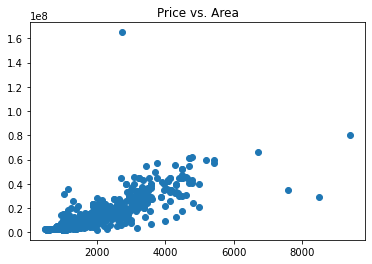

In [3]:
plt.scatter(data['Area'], data['Price'])
plt.title('Price vs. Area')

Text(0.5, 1.0, 'Price vs. No. of Bedrooms')

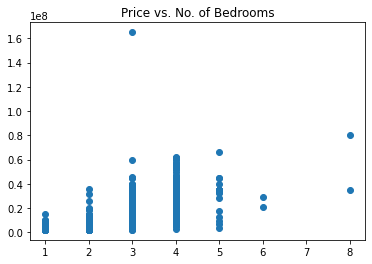

In [4]:
plt.scatter(data['No. of Bedrooms'], data['Price'])
plt.title('Price vs. No. of Bedrooms')

### Exercise 3d:
>_**Create a model called "two_feature_model" that uses "Price" as the target, and "Area and No. of Bedrooms" as features. Train the model and list the coefficients of the optimal solution.**_

In [5]:
two_feature_model = tc.linear_regression.create(data, features=['Area','No. of Bedrooms'], target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.014994     | 143755256.709403   | 8675152.286845       | 4961812.296500                  | 2270686.032471                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

**Coeficients**

In [6]:
two_feature_model.coefficients

name,index,value,stderr
(intercept),None,-4096242.6495432667,422854.31240754825
Area,None,10846.017848541129,222.73637123302674
No. of Bedrooms,None,-1495187.714449409,242064.02986716732


### Excercise 3e: 
>_**Use your trained model to predict the price of a house with:  
    1. 6000 squaree feet and 4 bedrooms.  
    2. 1000 square feet and 3 bedrooms.**_

In [10]:
house = tc.SFrame({'Area': [6000], 'No. of Bedrooms':[4]})
house

Area,No. of Bedrooms
6000,4


In [15]:
two_feature_model.predict(house)

dtype: float
Rows: 1
[54999113.583905876]

**The predicted price for 6000 square feet and 4 bedrooms is** $54999113.583905876.

In [16]:
house = tc.SFrame({'Area': [1000], 'No. of Bedrooms':[3]})
house

Area,No. of Bedrooms
1000,3


In [17]:
two_feature_model.predict(house)

dtype: float
Rows: 1
[2264212.0556496363]

**The predicted price for 1000 square feet and 3 bedrooms is** $2264212.0556496363

### Exercise 3f:
_**What is the maximum error and root-mean-squared error of two_feature_model?  
Compare there values with the errors for "model" and state which is better.**_

In [18]:
two_feature_model.evaluate(data)

{'max_error': 143755256.7094034, 'rmse': 4862677.243875818}

'Model' has a better result as this presents smaller values.